#                                                     INF 578

#                                                     Tarea 2

## Ignacio Araya

## Christián Serpell

# 1 Reducción de Dimensionalidad para Clasificación
## a)
Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine además el número promedio de palabras por ı́tem en cada clase.

In [2]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.read_csv('train_data.csv', header=0, index_col=0)
test_df = pd.read_csv('test_data.csv', header=0, index_col=0)
train_df.head()
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [5]:
import collections
print('Entrenamiento: datos: %s atributos (incluyendo clase): %s' % train_df.shape)
print('Pruebas: datos: %s atributos (incluyendo clase): %s' % test_df.shape)
train_df.describe()
collections.Counter(train_df['y'])

Entrenamiento: datos: 528 atributos (incluyendo clase): 11
Pruebas: datos: 462 atributos (incluyendo clase): 11


Counter({1: 48,
         2: 48,
         3: 48,
         4: 48,
         5: 48,
         6: 48,
         7: 48,
         8: 48,
         9: 48,
         10: 48,
         11: 48})

Se observa que tenemos 11 clases y los datos no están estandarizados, normalizados, ni centrados. Además, vemos que hay 48 elementos por clase, lo que significa que son clases balanceadas y equiprobables.

## b)
Construya matrices X e y que contengan las caracterı́sticas y las etiquetas correspondientes a los datos
de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [6]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:, 'x.1':'x.10'].values
y = train_df.loc[:, 'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)
X_test_std = Scaler.transform(test_df.loc[:, 'x.1':'x.10'].values)
y_test = test_df.loc[:, 'y'].values

En este caso los datos fueron estandarizados, es decir, llevados a una distribución normal (0, 1) en cada dimensión. Para los datos de test, se aplica la misma estandarización, suponiendo que la distribución de los datos es similar a la de entrenamiento.

## c)
Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

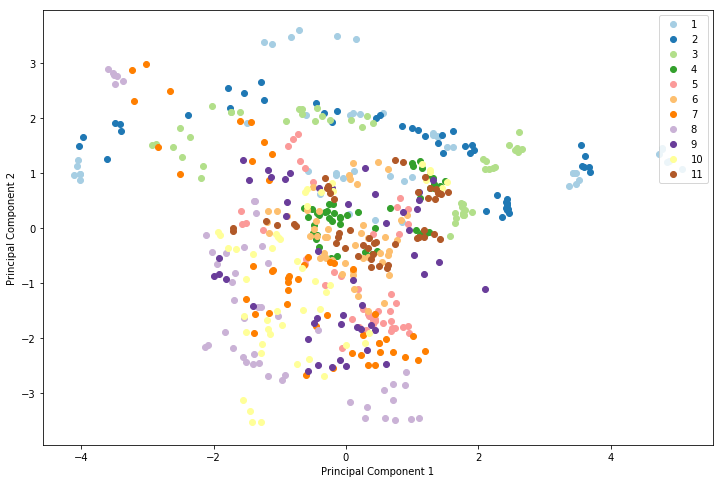

In [7]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as snssns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Paired')  # Paleta con 12 colores, ya que tenemos 11 clases
n_classes = 11
mclasses = tuple(range(1, n_classes + 1))
mcolors = [cmap(i) for i in np.linspace(0, 1, n_classes)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses, mcolors):
    plt.scatter(Xred_pca[y == lab, 0], Xred_pca[y == lab, 1], label=lab, c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## d)
Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

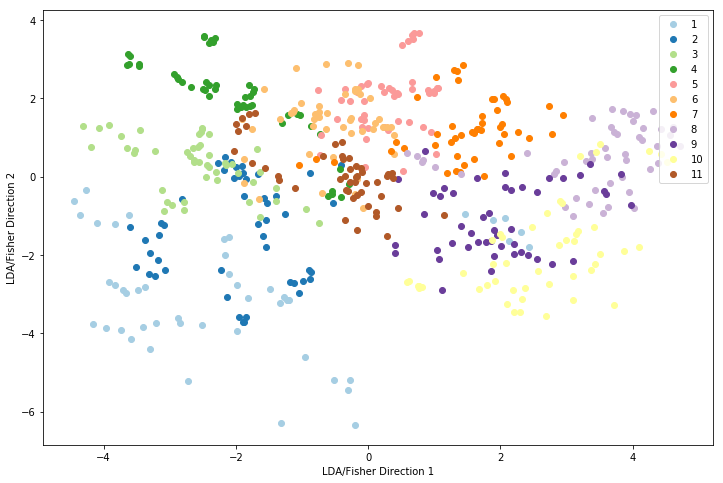

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std, y)
cmap = plt.cm.get_cmap('Paired')  # Paleta con 12 colores, ya que tenemos 11 clases
mclasses = tuple(range(1, n_classes + 1))
mcolors = [cmap(i) for i in np.linspace(0, 1, n_classes)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses, mcolors):
    plt.scatter(Xred_lda[y == lab, 0], Xred_lda[y == lab, 1], label=lab, c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## e)
Compare cualitativamente los resultados obtenidos en c y d.

Por un lado, tenemos PCA el cual está proyectando los datos en un plano de tal forma que la separación de las clases no es para nada evidente. Ésto se debe a que PCA sólo tiene en consideración la varianza global de los datos, y no por cada clase. Es decir, se busca maximizar la varianza global, pero no se toma en cuenta ninguna métrica para que los datos de distintas clases queden separados. Por otro lado, el algoritmo LDA sí toma en cuenta la separación de las clases, y ésto lo hace de dos formas: considera que la distancia entre las medias de las clases, proyectadas en los vectores escogidos, sea máxima, y la varianza entre los datos de cada clase (proyectados), sea mínima. Ésto se hace con tal de que los datos pertenecientes a las distintas clases se solapen lo menos posible en el espacio proyectado. Los resultados son evidentes a partir de los gráficos: la separación que observamos entre las clases en PCA es practicamente nula, mientras que en el caso de LDA sí se observa un menor solapamiento entre éstas, en especial en la proyección principal.

## f)
Construya un clasificador que determine la clase de un dato $x$ aleatoriamente sin considerar las caracterı́sticas sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase $y = 0$ ocurre el $25\%$ de las veces, su clasificador debe predecir esta clase para un determinado $x$ con probabilidad $0.25$, independiente de los atributos de $x$.

In [9]:
import collections
collections.Counter(y)

Counter({1: 48,
         2: 48,
         3: 48,
         4: 48,
         5: 48,
         6: 48,
         7: 48,
         8: 48,
         9: 48,
         10: 48,
         11: 48})

Podemos ver que la cantidad de elementos de cada clase es la misma (48). La probabilidad a priori es entonces la misma, y el clasificador aleatorio.

In [10]:
import random
def modelo_aleatorio():
    return random.randint(1, n_classes)
def probar_conjunto(lista_y):    
    aciertos = 0
    errores = 0
    for one_y in lista_y:
        if one_y == modelo_aleatorio():
            aciertos += 1
        else:
            errores += 1
    if aciertos + errores == 0:
        errores = 1
    return float(aciertos) / (aciertos + errores)
repeticiones = 1000
print('Score entrenamiento: %s' % (sum([probar_conjunto(y) for i in range(repeticiones)]) / repeticiones))
print('Score test: %s' % (sum([probar_conjunto(y_test) for i in range(repeticiones)]) / repeticiones))

Score entrenamiento: 0.091196969697
Score test: 0.0907554112554


Así, el modelo aleatorio, al repetirlo $1000$ veces sobre los datos de entrenamiento y test, da un score de alrededor de $0.09$. Ésto concuerda con el valor esperado de clasificación correcta, que es de $\frac{1}{11}$. Las repeticiones son necesarias, pues al ser aleatorio, el valor promedio de error podría variar de una repetición a otra, pero a medida que la cantidad de repeticiones aumenta, el valor promedio debería converger al valor esperado.

## g)
Compare el desempeño de LDA, QDA y un modelo de Vecinos Más Cercanos (k-NN) sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de k en el tercer modelo.

-----LDA-----
Entrenamiento: 0.683712121212
Test: 0.443722943723
-----QDA-----
Entrenamiento: 0.988636363636
Test: 0.471861471861
-----KNN-----


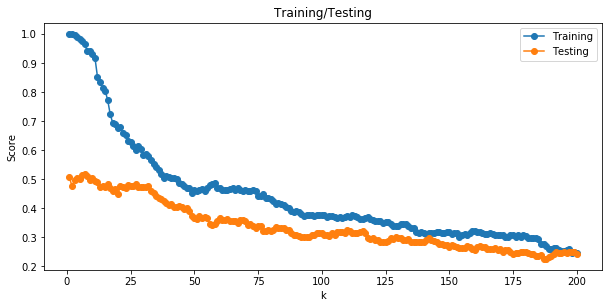

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Xtest = test_df.loc[:, 'x.1':'x.10'].values
ytest = test_df.loc[:, 'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_std, y)
print("-----LDA-----")
print('Entrenamiento: %s' % lda_model.score(X_std, y))
print('Test: %s' % lda_model.score(X_std_test, ytest))
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_std, y)
print("-----QDA-----")
print('Entrenamiento: %s' % qda_model.score(X_std, y))
print('Test: %s' % qda_model.score(X_std_test, ytest))
print("-----KNN-----")
knn_scores_training = []
knn_scores_testing = []
k = range(1, 201)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std, y)
    knn_scores_training.append(knn_model.score(X_std, y))
    knn_scores_testing.append(knn_model.score(X_std_test, ytest))
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k, knn_scores_training, '-o', k, knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc="upper right")
plt.show()

QDA se comporta mejor que LDA en ambos casos. Esto se debe a que considera una varianza diferente para cada clase, a diferencia de LDA que supone la misma matriz de covarianzas para todas las clases. Esto hace que el modelo de QDA sea más flexible, generando mejores fronteras de decisión. Tales fronteras de decisión, como sabemos a partir de la teoría, son cuadráticas, y se observa que los datos de entrenamiento fueron casi perfectamente separados utilizando tales fronteras. Sin embargo, el error de test es significativamente mayor que el de train, lo cual indica que el modelo hizo overfitting, y que las frotneras cuadráticas encontradas son en realidad una característica aleatoria de los datos de entrenamiento muestrados. Si tomaramos otra muestra de datos de entrenamiento y testing, éste fenómeno no se debería repetir: el error de entrenamiento podría aumentar considerablemente. No es posible concluir que QDA es mejor que LDA a menos que utilicemos muchas muestras diferentes. Esto se podría utilizando cross-validation no para estimación de parámetros, si no que para estimación del error de test.

Para evitar este problema, repetimos el experimento, ejecutando 10 remuestreos de los datos, a partir de juntar los datos de entrenamiento y test. En cada remuestreo, un $30\%$ de los datos se cosideraron como datos de test. Luego, el valor reportado es el promedio de cada uno de los remuestreos.

En relación al parámetro $k$, mientras menor sea, el error en los datos de entrenamiento es menor, ya que se aproxima a un clasificador que considera sólo el mismo dato de entrenamiento probado.  Sin embargo, en los datos de test, esto generaría overfitting. Luego es mejor considerar un $k$ distinto de $1$. Viendo el gráfico de arriba vemos que al aumentar excesivamente $k$, el score baja, tendiendo a un clasificador que considera simplemente la media de todos los datos. Para elegir el mejor $k$, debemos considerar los valores pequeños, donde el error en los datos de test y entrenamiento aun es bajo. El mejor valor de $k$ es entonces $k = 7$, y el score del conjunto de test es $0.52$.

-----LDA-----
Entrenamiento: 0.658008658009
Test: 0.56228956229
-----QDA-----
Entrenamiento: 0.930735930736
Test: 0.851851851852


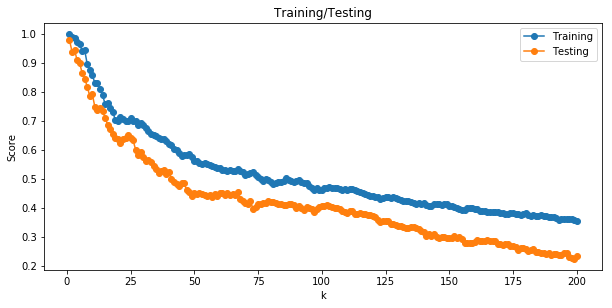

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

max_k = 201
data = pd.concat([train_df,test_df])

X_total = data.loc[:, 'x.1':'x.10'].values
y_total = data.loc[:, 'y'].values

lda_train_score = 0
lda_test_score = 0

qda_train_score = 0
qda_test_score = 0

knn_train_score = [0] * (max_k - 1)
knn_test_score = [0] * (max_k - 1)

K_cross = 10
for j in range(K_cross):
    # Muestreo de datos para generar train y test set
    X_train, X_test, y, ytest = train_test_split(
        X_total, y_total, test_size=0.3, random_state=42)

    # Escalamiento de los datos utilizando el train set
    Scaler = StandardScaler().fit(X_train)
    X_std = Scaler.transform(X_train)
    X_std_test = Scaler.transform(X_test)
    
    # Entrenamiento y evaluacion LDA
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_std, y)
    
    lda_train_score += lda_model.score(X_std,y) / K_cross
    lda_test_score += lda_model.score(X_std_test,ytest) / K_cross

    # Entrenamiento y evaluacion QDA
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_std, y)
    
    qda_train_score += qda_model.score(X_std,y) / K_cross
    qda_test_score += qda_model.score(X_std_test,ytest) / K_cross

    # Entrenamiento y evaluacion K-NN diversos K
    k = range(1, max_k)
    for c in k:
        knn_model = KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(X_std, y)
        
        knn_train_score[c - 1] += knn_model.score(X_std, y) / K_cross
        knn_test_score[c - 1] += knn_model.score(X_std_test, ytest) / K_cross

print("-----LDA-----")
print('Entrenamiento: %s' % lda_train_score)
print('Test: %s' % lda_test_score)

print("-----QDA-----")
print('Entrenamiento: %s' % qda_train_score)
print('Test: %s' % qda_test_score)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k, knn_train_score, '-o', k, knn_test_score, '-o')
plt.legend(("Training", "Testing"), loc="upper right")
plt.show()

Como vemos en este último reporte, efectivamente los resultados variaron, indicando mejor la capacidad de generalización de los modelos. Por un lado, QDA resulta mucho mejor que LDA, lo que indica que los datos no son linealmente separables. Además, se ve que los modelos de k-NN tienen errores menores cuando $k$ es pequeño. Entonces, además, los datos no quedan completamente bien modelados usando Gaussianas, que es lo que suponen tanto LDA como QDA. Interesantemente, el mejor modelo, en promedio, para k-NN, se dió cuando $k=1$, que es un modelo que responde simplemente la clase del elemento de entrenamiento más cercano. Así, los datos tienen poca componente de dependencia espacial entre ellos, con una gran varianza.

## h)
Utilice PCA para generar una representación de la data en $d' = 1, 2, 3, \ldots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

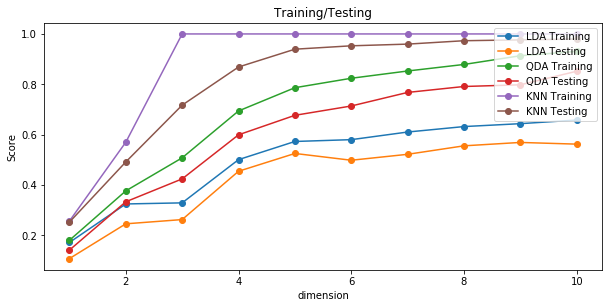

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.concat([train_df,test_df])

X_total = data.loc[:, 'x.1':'x.10'].values
y_total = data.loc[:, 'y'].values

K_cross = 10
max_dimension = 10  # Maximo numero de dimensiones a probar

scores_train_lda = [0.] * max_dimension
scores_train_qda = [0.] * max_dimension
scores_train_knn = [0.] * max_dimension
scores_test_lda = [0.] * max_dimension
scores_test_qda = [0.] * max_dimension
scores_test_knn = [0.] * max_dimension

for j in range(K_cross):

    X_train, X_test, y, ytest = train_test_split(
        X_total, y_total, test_size=0.3, random_state=42)

    Scaler = StandardScaler().fit(X_train)
    X_std = Scaler.transform(X_train)
    X_std_test = Scaler.transform(X_test)

    max_k = 50  # Maximo k para probar en k-NN
    repeticiones = 1  # Cantidad de repeticiones para probar k-NN
    for dimension in range(1, max_dimension + 1):
        # print("Dimension: %s" % dimension)
        sklearn_pca = PCA(n_components=dimension)
        X_train_pca = sklearn_pca.fit_transform(X_std)
        X_test_pca = sklearn_pca.transform(X_std_test)
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(X_train_pca, y)
        score_train_lda = lda_model.score(X_train_pca, y)
        score_test_lda = lda_model.score(X_test_pca, ytest)
        # print('LDA Entrenamiento: %s Test: %s' % (score_train_lda, score_test_lda))
        scores_train_lda[dimension - 1] += score_train_lda / K_cross
        scores_test_lda[dimension - 1] += score_test_lda / K_cross
        qda_model = QuadraticDiscriminantAnalysis()
        qda_model.fit(X_train_pca, y)
        score_train_qda = qda_model.score(X_train_pca, y)
        score_test_qda = qda_model.score(X_test_pca, ytest)
        # print('QDA Entrenamiento: %s Test: %s' % (score_train_qda, score_test_qda))

        scores_train_qda[dimension - 1] += score_train_qda / K_cross
        scores_test_qda[dimension - 1] += score_test_qda / K_cross

        knn_scores_training = [0.] * max_k
        knn_scores_testing = [0.] * max_k
        for i in range(repeticiones):
            for c in range(1, max_k):
                knn_model = KNeighborsClassifier(n_neighbors=c)
                knn_model.fit(X_train_pca, y)
                knn_scores_training[c] += knn_model.score(X_train_pca, y)
                knn_scores_testing[c] += knn_model.score(X_test_pca, ytest)
        best_k = 1
        best_test_score = 0.
        for c in range(1, max_k):
            if best_test_score < knn_scores_testing[c]:
                best_test_score = knn_scores_testing[c]
                best_k = c
        score_train_knn = knn_scores_training[best_k] / repeticiones
        score_test_knn = knn_scores_testing[best_k] / repeticiones
        # print('KNN k = %s Entrenamiento: %s Test: %s' % (best_k, score_train_knn, score_test_knn))
        scores_train_knn[dimension - 1] += score_train_knn / K_cross
        scores_test_knn[dimension - 1] += score_test_knn / K_cross

dimensiones = list(range(1, max_dimension + 1))
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("dimension")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(dimensiones, scores_train_lda, '-o', dimensiones, scores_test_lda, '-o',
         dimensiones, scores_train_qda, '-o', dimensiones, scores_test_qda, '-o',
         dimensiones, scores_train_knn, '-o', dimensiones, scores_test_knn, '-o')
plt.legend(("LDA Training", "LDA Testing", "QDA Training", "QDA Testing", "KNN Training", "KNN Testing"),
            loc="upper right")
plt.show()

Modificamos el código original e implementamos un remuestreo de los conjuntos train y test para la estimación de los Scores. En cada remuestreo, se tomó el 30% de los datos como test, y se remuestreó 10 veces. Ésto permite que los algoritmos sean comparados en diferentes instancias tratando de que los Score no se sobreajusten a un solo conjunto de datos que podría ser arbitrariamente más favorable para algunos algoritmos que para otros.

Para cada valor de $d'$, se consideró el $k$ de k-NN que maximiza el score sobre el conjunto de test. Vemos que todos los algoritmos aumentan su desempeño a medida que se aumenta el número de dimensiones. Aún así, es importante notar que a partir de la dimensión 5, la razón de mejora del desempeño disminuye considerablemente. Esto significa que las primeras 5 dimensiones son las más significativas para todos los algoritmos. Esto es aún más visible en el caso de LDA, en el cual incluso se observa un disminución del desempeño al pasar de 5 a 6 dimensiones, y, finalmente, la diferencia entre LDA con 5 dimensiones y todas las dimensiones es casi nula.

## i)
Utilice LDA para generar una representación de la data en $d' = 1, 2, 3, \ldots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

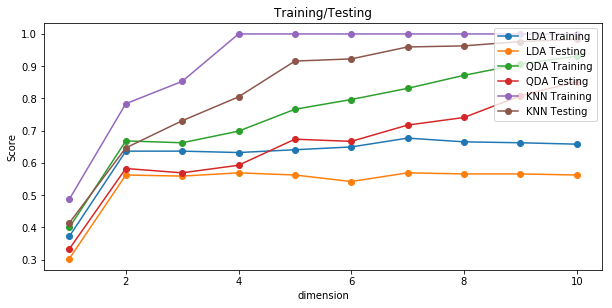

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.concat([train_df,test_df])

X_total = data.loc[:, 'x.1':'x.10'].values
y_total = data.loc[:, 'y'].values

K_cross = 10
max_dimension = 10  # Maximo numero de dimensiones a probar

scores_train_lda = [0.] * max_dimension
scores_train_qda = [0.] * max_dimension
scores_train_knn = [0.] * max_dimension
scores_test_lda = [0.] * max_dimension
scores_test_qda = [0.] * max_dimension
scores_test_knn = [0.] * max_dimension

for j in range(K_cross):

    X_train, X_test, y, ytest = train_test_split(
        X_total, y_total, test_size=0.3, random_state=42)

    Scaler = StandardScaler().fit(X_train)
    X_std = Scaler.transform(X_train)
    X_std_test = Scaler.transform(X_test)

    max_k = 50  # Maximo k para probar en k-NN
    repeticiones = 1  # Cantidad de repeticiones para probar k-NN
    for dimension in range(1, max_dimension + 1):
        # print("Dimension: %s" % dimension)
        sklearn_lda = LinearDiscriminantAnalysis(n_components=dimension) 
        X_train_pca = sklearn_lda.fit_transform(X_std, y)  # no es pca, es lda
        X_test_pca = sklearn_lda.transform(X_std_test)  # no es pca, es lda
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(X_train_pca, y)
        score_train_lda = lda_model.score(X_train_pca, y)
        score_test_lda = lda_model.score(X_test_pca, ytest)
        # print('LDA Entrenamiento: %s Test: %s' % (score_train_lda, score_test_lda))
        scores_train_lda[dimension - 1] += score_train_lda / K_cross
        scores_test_lda[dimension - 1] += score_test_lda / K_cross
        qda_model = QuadraticDiscriminantAnalysis()
        qda_model.fit(X_train_pca, y)
        score_train_qda = qda_model.score(X_train_pca, y)
        score_test_qda = qda_model.score(X_test_pca, ytest)
        # print('QDA Entrenamiento: %s Test: %s' % (score_train_qda, score_test_qda))

        scores_train_qda[dimension - 1] += score_train_qda / K_cross
        scores_test_qda[dimension - 1] += score_test_qda / K_cross

        knn_scores_training = [0.] * max_k
        knn_scores_testing = [0.] * max_k
        for i in range(repeticiones):
            for c in range(1, max_k):
                knn_model = KNeighborsClassifier(n_neighbors=c)
                knn_model.fit(X_train_pca, y)
                knn_scores_training[c] += knn_model.score(X_train_pca, y)
                knn_scores_testing[c] += knn_model.score(X_test_pca, ytest)
        best_k = 1
        best_test_score = 0.
        for c in range(1, max_k):
            if best_test_score < knn_scores_testing[c]:
                best_test_score = knn_scores_testing[c]
                best_k = c
        score_train_knn = knn_scores_training[best_k] / repeticiones
        score_test_knn = knn_scores_testing[best_k] / repeticiones
        # print('KNN k = %s Entrenamiento: %s Test: %s' % (best_k, score_train_knn, score_test_knn))
        scores_train_knn[dimension - 1] += score_train_knn / K_cross
        scores_test_knn[dimension - 1] += score_test_knn / K_cross

dimensiones = list(range(1, max_dimension + 1))
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("dimension")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(dimensiones, scores_train_lda, '-o', dimensiones, scores_test_lda, '-o',
         dimensiones, scores_train_qda, '-o', dimensiones, scores_test_qda, '-o',
         dimensiones, scores_train_knn, '-o', dimensiones, scores_test_knn, '-o')
plt.legend(("LDA Training", "LDA Testing", "QDA Training", "QDA Testing", "KNN Training", "KNN Testing"),
            loc="upper right")
plt.show()

Para cada valor de $d'$, se consideró el $k$ de k-NN que maximiza el score sobre el conjunto de test. En este caso, vemos que la información entregada por la reduccción de dimensionalidad por LDA es mayor que en el caso de PCA. Especialmente, vemos que $d' = 2$ agrega la mayor cantidad de información. Al agregar más dimensiones, QDA mejora su desempeño lentamente, en cuando LDA no logra mejorar su desempeño. Esto se debe a que, como la proyección de reducción de dimensionalidad se hizo con LDA, se obtienen las mejores direcciones de proyección allí, y el algoritmo posterior ya no logra separar aun más los datos.

# 2 Análisis de Opiniones sobre Películas
## a)
Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [14]:
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data2.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data2.csv")
ftr = open("train_data2.csv", "r")
fts = open("test_data2.csv", "r")
rows = [line.split(" ", 1) for line in ftr.readlines()] 
train_df = pd.DataFrame(rows, columns=['Sentiment', 'Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ", 1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment', 'Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
train_counts = train_df['Sentiment'].value_counts()
test_counts = test_df['Sentiment'].value_counts()
print('Entrenamiento:\ndatos: %s clases:\n%s' % (train_df.shape[0], train_df['Sentiment'].value_counts()))
print('Pruebas:\ndatos: %s clases:\n%s' % (test_df.shape[0], test_df['Sentiment'].value_counts()))
train_df.describe()

Entrenamiento:
datos: 3554 clases:
-1    1784
 1    1770
Name: Sentiment, dtype: int64
Pruebas:
datos: 3554 clases:
-1    1803
 1    1751
Name: Sentiment, dtype: int64


,Sentiment
count,3554.000000
mean,-0.003939
std,1.000133
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


Vemos que cada conjunto tiene 3554 elementos. El de entrenamiento, tiene 1784 de clase -1 y 1770 de clase 1. El de pruebas, tiene 1803 de clase -1 y 1752 de clase 1.

## b)
Construya una función, denominada word_extractor, que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [15]:
import re, time
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cserpell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cserpell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
def word_extractor(text, use_stem=True):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    if use_stem:
        wordtokens = [ps.stem(word.lower()) for word in word_tokenize(text)]
    else:
        wordtokens = [word.lower() for word in word_tokenize(text)]
    return ' '.join(word for word in wordtokens if word not in commonwords)
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))
print(word_extractor("I do not love eating cake", use_stem=False))
print(word_extractor("I don't love eating cake", use_stem=False))
print(word_extractor("I did not love eating cookies"))
print(word_extractor("I loved eating cookies"))
print(word_extractor("I did not love eating cookies", use_stem=False))
print(word_extractor("I loved eating cookies", use_stem=False))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake
not love eating cake
n't love eating cake
not love eat cooki
love eat cooki
not love eating cookies
loved eating cookies


Stemming cambia las conjugaciones de los verbos a la raíz, y elimina los plurales, dejando solo la raíz de la palabra, como en el caso de cookies -> cooki.

# c)
Construya una función, denominada word_extractor2, análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [20]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/cserpell/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
def get_wordnet_tag(tag):
    if tag.startswith('JJ'):
        return 'a'
    if tag.startswith('RB') or tag == "WRB":
        return 'r'
    if tag.startswith('NN') or tag.startswith("WP"):
        return 'n'
    if tag.startswith('VB'):
        return 'v'
    return None

def lemmatize_words(lemmatizer, words):
    tagged = pos_tag(words)
    lemmas = []
    for word, tag in tagged:
        wntag = get_wordnet_tag(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag)
        lemmas.append(lemma)
    return lemmas

def word_extractor2(text, use_lemma=True):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    if use_lemma:
        wordtokens = lemmatize_words(wordlemmatizer, word_tokenize(text.decode('utf-8', 'ignore').lower()))
    else:
        wordtokens = word_tokenize(text.decode('utf-8', 'ignore').lower())
    return ' '.join(word for word in wordtokens if word not in commonwords)

print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))
print(word_extractor2("I do not love eating cake", use_lemma=False))
print(word_extractor2("I don't love eating cake", use_lemma=False))
print(word_extractor2("I did not love eating cookies"))
print(word_extractor2("I loved eating cookies"))
print(word_extractor2("I did not love eating cookies", use_lemma=False))
print(word_extractor2("I loved eating cookies", use_lemma=False))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake
not love eating cake
n't love eating cake
not love eat cooky
love eating cooky
not love eating cookies
loved eating cookies


En este caso, en vez de recortar la palabra a su raíz, cambia la palabra a la palabra raíz completa, como en el caso de cookies -> cooky.

Para mejorar la programación de la tarea, creamos una versión final de word_extractor que realiza todas las funciones, y posee argumentos para definir qué acciones realizar.

In [23]:
def word_extractor_final(text, use_stem=False, use_lemma=True, remove_commonwords=True):
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    wordtokens = word_tokenize(text.decode('utf-8', 'ignore').lower())
    if use_lemma:
        wordlemmatizer = WordNetLemmatizer()
        wordtokens = lemmatize_words(wordlemmatizer, wordtokens)
    elif use_stem:
        ps = PorterStemmer()
        wordtokens = [ps.stem(word) for word in wordtokens]
    if remove_commonwords:
        commonwords = stopwords.words('english')
        commonwords.remove("not")
        wordtokens = [word for word in wordtokens if word not in commonwords]
    return ' '.join(wordtokens)

# d)
Utilizando la función CountVectorizer de la librerı́a sklearn y de acuerdo a las directrices mencionadas en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cserpell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float) + 1) / 2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float) + 1) / 2.0)
vocab = vectorizer.get_feature_names()
dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))
for tag, count in sorted(zip(vocab, dist), key=lambda x: -x[1]):
    print(count, tag)

(573, u'film')
(481, u'movie')
(266, u'not')
(264, u'make')
(254, u'like')
(246, u'one')
(176, u'story')
(169, u'good')
(163, u'character')
(145, u'comedy')
(143, u'even')
(143, u'time')
(129, u'work')
(128, u'much')
(127, u'well')
(125, u'get')
(115, u'way')
(114, u'performance')
(112, u'funny')
(111, u'take')
(109, u'see')
(108, u'director')
(106, u'look')
(103, u'life')
(103, u'little')
(97, u'bad')
(97, u'feel')
(93, u'go')
(92, u'enough')
(92, u'never')
(88, u'best')
(83, u'thing')
(80, u'end')
(79, u'would')
(78, u'give')
(78, u'seem')
(76, u'audience')
(75, u'could')
(74, u'come')
(72, u'drama')
(72, u'nothing')
(71, u'may')
(71, u'watch')
(69, u'love')
(68, u'year')
(67, u'action')
(67, u'fun')
(67, u'great')
(66, u'really')
(65, u'big')
(64, u'long')
(64, u'minute')
(63, u'cast')
(63, u'every')
(63, u'plot')
(63, u'without')
(62, u'two')
(60, u'find')
(58, u'something')
(57, u'keep')
(56, u'many')
(55, u'play')
(55, u'show')
(55, u'though')
(54, u'also')
(54, u'people')
(53, u

(6, u'mistake')
(6, u'mix')
(6, u'moore')
(6, u'murphy')
(6, u'nasty')
(6, u'nerve')
(6, u'nice')
(6, u'nicely')
(6, u'notch')
(6, u'painfully')
(6, u'paint')
(6, u'parable')
(6, u'parody')
(6, u'pass')
(6, u'passionate')
(6, u'perspective')
(6, u'peter')
(6, u'pianist')
(6, u'player')
(6, u'pleasant')
(6, u'pleaser')
(6, u'polanski')
(6, u'portrayal')
(6, u'potentially')
(6, u'pow')
(6, u'preachy')
(6, u'precious')
(6, u'process')
(6, u'product')
(6, u'promising')
(6, u'propaganda')
(6, u'protagonist')
(6, u'puzzle')
(6, u'que')
(6, u'racial')
(6, u'reaction')
(6, u'refreshingly')
(6, u'reign')
(6, u'rely')
(6, u'retread')
(6, u'revelatory')
(6, u'roman')
(6, u'sacrifice')
(6, u'sadly')
(6, u'satirical')
(6, u'scale')
(6, u'scooby')
(6, u'scratch')
(6, u'sentimentality')
(6, u'shadow')
(6, u'shallow')
(6, u'showtime')
(6, u'sight')
(6, u'simplistic')
(6, u'soderbergh')
(6, u'solondz')
(6, u'south')
(6, u'spare')
(6, u'spectacular')
(6, u'spielberg')
(6, u'stale')
(6, u'step')
(6, u'st

(2, u'ignite')
(2, u'ilk')
(2, u'illuminate')
(2, u'illusion')
(2, u'imaginatively')
(2, u'immature')
(2, u'immediate')
(2, u'impenetrable')
(2, u'impersonation')
(2, u'impish')
(2, u'implication')
(2, u'implicit')
(2, u'importantly')
(2, u'impostor')
(2, u'improvisation')
(2, u'improvised')
(2, u'inadvertently')
(2, u'incarnate')
(2, u'incoherence')
(2, u'incomprehensible')
(2, u'incongruous')
(2, u'inconsequential')
(2, u'inconsistent')
(2, u'incorporate')
(2, u'increase')
(2, u'indicative')
(2, u'indifferent')
(2, u'indistinct')
(2, u'indulge')
(2, u'inelegant')
(2, u'inertia')
(2, u'inescapable')
(2, u'inexorably')
(2, u'inferior')
(2, u'infinitely')
(2, u'infomercial')
(2, u'ingenious')
(2, u'initial')
(2, u'initially')
(2, u'injury')
(2, u'innovation')
(2, u'insane')
(2, u'insecure')
(2, u'insignificance')
(2, u'insistently')
(2, u'inspires')
(2, u'insult')
(2, u'insulting')
(2, u'integrate')
(2, u'integrated')
(2, u'integrity')
(2, u'intensely')
(2, u'intent')
(2, u'intentionall

(1, u'eponymous')
(1, u'epps')
(1, u'equation')
(1, u'equilibrium')
(1, u'equipment')
(1, u'equipped')
(1, u'erects')
(1, u'erika')
(1, u'erotically')
(1, u'eroticism')
(1, u'errant')
(1, u'erupt')
(1, u'es')
(1, u'escalating')
(1, u'escort')
(1, u'esfera')
(1, u'esoteric')
(1, u'espetculo')
(1, u'espionage')
(1, u'espn')
(1, u'essay')
(1, u'essayist')
(1, u'essential')
(1, u'esteem')
(1, u'estela')
(1, u'esteticamente')
(1, u'esther')
(1, u'estridencias')
(1, u'et')
(1, u'ethical')
(1, u'etoiles')
(1, u'etre')
(1, u'eugene')
(1, u'eun')
(1, u'euro')
(1, u'evaluate')
(1, u'evans')
(1, u'evaporate')
(1, u'evenhanded')
(1, u'everlasting')
(1, u'everyday')
(1, u'everytime')
(1, u'evokes')
(1, u'evolution')
(1, u'ex')
(1, u'exalt')
(1, u'exceed')
(1, u'excel')
(1, u'excels')
(1, u'excessive')
(1, u'excessively')
(1, u'exclamation')
(1, u'exclusively')
(1, u'excruciate')
(1, u'excruciating')
(1, u'executed')
(1, u'exemplary')
(1, u'exhilaratingly')
(1, u'exhume')
(1, u'exibi')
(1, u'expansi

(1, u'residence')
(1, u'residual')
(1, u'resistance')
(1, u'resnick')
(1, u'resolute')
(1, u'resolution')
(1, u'resoundingly')
(1, u'resource')
(1, u'resourceful')
(1, u'respectably')
(1, u'respectful')
(1, u'respond')
(1, u'response')
(1, u'responsibility')
(1, u'restate')
(1, u'restatement')
(1, u'restraint')
(1, u'restroom')
(1, u'resultado')
(1, u'retelling')
(1, u'rethink')
(1, u'retiring')
(1, u'retooling')
(1, u'retrata')
(1, u'retreat')
(1, u'retrograde')
(1, u'retrospective')
(1, u'retrospectively')
(1, u'reveals')
(1, u'revel')
(1, u'revelaciones')
(1, u'revelation')
(1, u'reverberate')
(1, u'revere')
(1, u'reverence')
(1, u'reverent')
(1, u'reverie')
(1, u'reversal')
(1, u'review')
(1, u'revision')
(1, u'revoke')
(1, u'reworked')
(1, u'reworking')
(1, u'rez')
(1, u'rhino')
(1, u'rib')
(1, u'ribbon')
(1, u'richer')
(1, u'rid')
(1, u'riddled')
(1, u'ridicule')
(1, u'ridiculously')
(1, u'ridiculousness')
(1, u'rife')
(1, u'rig')
(1, u'rigged')
(1, u'righteousness')
(1, u'rigid'

Hemos impreso la lista de palabras ordenada según cantidad de aparición en todos los textos de entrenamiento. Podemos ver que las palabras más comunes tienen que ver con las películas, debido a que estamos trabajando con una base de datos de opiniones de películas. Además, hay palabras comunes del inglés, tales como "not", "one", "make" y "get".

# e)
Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función classification_report de la librerı́a sklearn.

In [26]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y, xt, yt, text, print_data=True):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    if print_data:
        print("Training Accuracy %s: %f" % (text, acc_tr))
        print("Test Accuracy %s: %f" % (text, acc_test))
        print("Detailed Analysis Testing Results ...")
        print(classification_report(yt, model.predict(xt), target_names=['+', '-']))
    return acc_tr, acc_test  # Se usara mas adelante

Accuracy es definido aquí como el score al probar un modelo en un conjunto de datos etiquetados, donde el score es una medida de desempeño que depende del modelo (según la [definición de scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html)). Generalmente es la proporción de datos bien clasificados, del total de los datos.

En el reporte dado por classification_report se muestra, para cada clase:
- Precision: verdaderos positivos / (verdaderos positivos + falsos positivos). Proporción de los clasificados en esta clase eran de esta clase.
- Recall: verdaderos positivos / (verdaderos positivos + falsos negativos). Proporción de los datos de la clase clasificados correctamente.
- F1-score: 2 * precision * recall / (precision + recall). Medida que considera precision y recall.
- Support: Cantidad de elementos que son de la clase (independiente de lo que diga el modelo).

# f)
Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las caracterı́sticas no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las caracterı́sticas extraı́das en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

In [35]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import random
def do_NAIVE_BAYES(x, y, xt, yt, print_data=True):
    model = BernoulliNB()
    model = model.fit(x, y)
    acc_tr, acc_test = score_the_model(model, x, y, xt, yt, "BernoulliNB", print_data=print_data)
    return model, acc_tr, acc_test

def test_one_model(texts_train, labels_train, texts_test, labels_test, print_data=True):
    vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
    vectorizer.fit(np.asarray(texts_train))
    features_train = vectorizer.transform(texts_train)
    features_test = vectorizer.transform(texts_test)
    return do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test, print_data=print_data)

def test_with_resampling(use_stem=False, use_lemma=True, remove_commonwords=True, name=''):
    K_cross = 10
    all_data = pd.concat([train_df, test_df])
    all_texts = [word_extractor_final(text, use_stem=use_stem, use_lemma=use_lemma,
                                      remove_commonwords=remove_commonwords)
                 for text in all_data.Text]
    all_labels = np.asarray((all_data.Sentiment.astype(float) + 1) / 2.0)
    total_acc_tr = 0.
    total_acc_test = 0.
    for j in range(K_cross):
        texts_train, texts_test, labels_train, labels_test = train_test_split(
            all_texts, all_labels, test_size=0.3, random_state=42)
        model, acc_tr, acc_test = test_one_model(texts_train, labels_train, texts_test, labels_test, print_data=False)
        total_acc_tr += acc_tr / K_cross
        total_acc_test += acc_test / K_cross
    print('=' * 100)
    print('Caso {} : training: {} test: {}'.format(name, total_acc_tr, total_acc_test))

test_with_resampling(use_stem=False, use_lemma=True, remove_commonwords=True,
                     name='con lemmatizer y filtrando stopwords')
test_with_resampling(use_stem=False, use_lemma=True, remove_commonwords=False,
                     name='con lemmatizer y sin filtrar stopwords')
test_with_resampling(use_stem=True, use_lemma=False, remove_commonwords=True,
                     name='con stemming y filtrando stopwords')
test_with_resampling(use_stem=True, use_lemma=False, remove_commonwords=False,
                     name='con stemming y sin filtrar stopwords')
test_with_resampling(use_stem=False, use_lemma=False, remove_commonwords=True,
                     name='solo sacando stopwords')
test_with_resampling(use_stem=False, use_lemma=False, remove_commonwords=False,
                     name='sin preprocesamiento')

Caso con lemmatizer y filtrando stopwords : training: 0.938492462312 test: 0.763602251407
Caso con lemmatizer y sin filtrar stopwords : training: 0.934472361809 test: 0.774859287054
Caso con stemming y filtrando stopwords : training: 0.929648241206 test: 0.768292682927
Caso con stemming y sin filtrar stopwords : training: 0.923216080402 test: 0.767823639775
Caso solo sacando stopwords : training: 0.952361809045 test: 0.766885553471
Caso sin preprocesamiento : training: 0.953165829146 test: 0.772045028143


Para poder comparar los resultados de distintos modelos, tuvimos que hacer un resampling, similar al realizado en la pregunta 1. Si no se hace, resulta que estamos eligiendo el mejor modelo para los datos de test dados, lo que podría no resultar en una buena generalización.

A través de los resultados obtenidos, vemos que hay una mejora leve cuando no son filtrados los stopwords, en todos los casos, aunque es muy pequeña. El mejor desempeño se observó usando lemmatizer en vez de stemming, aun cuando la diferencia entre todos los modelos es prácticamente nula.

A continuación vemos una exploración manual del mejor modelo.

In [44]:
# Reentrenamos usando lemmatizer y sin filtrar stopwords
texts_train = [word_extractor_final(text, use_stem=False, use_lemma=True, remove_commonwords=False)
               for text in train_df.Text]
texts_test = [word_extractor_final(text, use_stem=False, use_lemma=True, remove_commonwords=False)
              for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float) + 1) / 2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float) + 1) / 2.0)
model, acc_tr, acc_test = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(range(len(test_pred)), 15)
for one in spl:
    print('=' * 100)
    print('Analizando texto {}'.format(one))
    print(texts_test[one])
    print('Clase negativa: {} Clase positiva: {} Real: {}'.format(
        test_pred[one][0], test_pred[one][1], labels_test[one]))

Training Accuracy BernoulliNB: 0.946539
Test Accuracy BernoulliNB: 0.750633
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.75      0.75      1803
          -       0.75      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554

Analizando texto 1013
uncertain in tone . . . a garbled exercise in sexual politics , a junior varsity short cut by way of very bad thing .
Clase negativa: 0.614413970919 Clase positiva: 0.385586029081 Real: 0.0
Analizando texto 2274
it 's usually a bad sign when director abandon their script and go where the moment take them , but olympia , wash . , base filmmaker anne de marcken and marilyn freeman do just that and it 's what make their project so interesting .
Clase negativa: 0.998373093186 Clase positiva: 0.00162690681384 Real: 1.0
Analizando texto 2150
i ca n't say this enough : this movie be about an adult male dress in pink jammies .
Clase negativa: 0.9781

A partir de los textos explorados, vemos que a veces incluso para uno es muy difícil asignar una probabilidad de ser una opinión positiva o negativa. En general el modelo se comporta bien. Como el modelo ignora cualquier relación que haya entre las palabras, lo que sucede es que la presencia de ciertas palabras positivas hace que la clasificación sea positiva, y la de palabras negativas en una clasificación negativa, aunque el contexto diga lo contrario.

# g)
Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraı́dos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

Para esta pregunta repetiremos el proceso de la pregunta f), donde el procedimiento correcto para escoger tanto el mejor procesamiento, como el mejor valor de $C$, es usando un resampling. Esta vez se hicieron solo $5$ para cada combinación de parámetros, dada la mayora cantidad de pruebas a realizar.

In [46]:
from sklearn.svm import LinearSVC

def do_SVM(x, y, xt, yt, C, print_data=True):
    model = LinearSVC(C=C)
    model = model.fit(x, y)
    acc_tr, acc_test = score_the_model(model, x, y, xt, yt, "SVM", print_data=print_data)
    return model, acc_tr, acc_test

def test_one_SVM(texts_train, labels_train, texts_test, labels_test, C, print_data=True):
    vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
    vectorizer.fit(np.asarray(texts_train))
    features_train = vectorizer.transform(texts_train)
    features_test = vectorizer.transform(texts_test)
    return do_SVM(features_train, labels_train, features_test, labels_test, C, print_data=print_data)

def test_SVM_with_resampling(C, use_stem=False, use_lemma=True, remove_commonwords=True, name=''):
    K_cross = 5
    all_data = pd.concat([train_df, test_df])
    all_texts = [word_extractor_final(text, use_stem=use_stem, use_lemma=use_lemma,
                                      remove_commonwords=remove_commonwords)
                 for text in all_data.Text]
    all_labels = np.asarray((all_data.Sentiment.astype(float) + 1) / 2.0)
    total_acc_tr = 0.
    total_acc_test = 0.
    for j in range(K_cross):
        texts_train, texts_test, labels_train, labels_test = train_test_split(
            all_texts, all_labels, test_size=0.3, random_state=42)
        model, acc_tr, acc_test = test_one_SVM(texts_train, labels_train, texts_test, labels_test, C, print_data=False)
        total_acc_tr += acc_tr / K_cross
        total_acc_test += acc_test / K_cross
    print('=' * 100)
    print('Caso {} : training: {} test: {}'.format(name, total_acc_tr, total_acc_test))

Cs = [0.01, 0.1, 10, 100, 1000]
for C in Cs:
    print('*' * 100)
    print('Pruebas con C={}'.format(C))
    test_SVM_with_resampling(C, use_stem=False, use_lemma=True, remove_commonwords=True,
                             name='C={} con lemmatizer y filtrando stopwords'.format(C))
    test_SVM_with_resampling(C, use_stem=False, use_lemma=True, remove_commonwords=False,
                             name='C={} con lemmatizer y sin filtrar stopwords'.format(C))
    test_SVM_with_resampling(C, use_stem=True, use_lemma=False, remove_commonwords=True,
                             name='C={} con stemming y filtrando stopwords'.format(C))
    test_SVM_with_resampling(C, use_stem=True, use_lemma=False, remove_commonwords=False,
                             name='C={} con stemming y sin filtrar stopwords'.format(C))
    test_SVM_with_resampling(C, use_stem=False, use_lemma=False, remove_commonwords=True,
                             name='C={} solo sacando stopwords'.format(C))
    test_SVM_with_resampling(C, use_stem=False, use_lemma=False, remove_commonwords=False,
                             name='C={} sin preprocesamiento'.format(C))

****************************************************************************************************
Pruebas con C=0.01
Caso C=0.01 con lemmatizer y filtrando stopwords : training: 0.873768844221 test: 0.735459662289
Caso C=0.01 con lemmatizer y sin filtrar stopwords : training: 0.864924623116 test: 0.736866791745
Caso C=0.01 con stemming y filtrando stopwords : training: 0.876381909548 test: 0.734990619137
Caso C=0.01 con stemming y sin filtrar stopwords : training: 0.862311557789 test: 0.741088180113
Caso C=0.01 solo sacando stopwords : training: 0.892663316583 test: 0.730300187617
Caso C=0.01 sin preprocesamiento : training: 0.873366834171 test: 0.731707317073
****************************************************************************************************
Pruebas con C=0.1
Caso C=0.1 con lemmatizer y filtrando stopwords : training: 0.977688442211 test: 0.744371482176
Caso C=0.1 con lemmatizer y sin filtrar stopwords : training: 0.978291457286 test: 0.75
Caso C=0.1 con stemming y

Vemos que el mejor valor para $C$ es $0.1$ en todos los casos. Probablemente, al aumentar el valor de $C$, los datos de entrenamiento quedan mejor clasificados, pues se permite una tolerancia al error mayor en la SVM, pero su capacidad de generalización es menor cuando lo sometemos a conjuntos de prueba. Nuevamente, vemos que el filtrar los stopwords empeora el desempeño en todos los casos. Aun de manera más interesante, vemos que no realizar ni stemming ni lemmatizing mejora los resultados, aunque de una manera prácticamente nula.

El mejor modelo SVM encontrado ($C=0.1$ y sin ningún preprocesamiento), tiene un score de $0.758$, mientras que el mejor modelo Naive Bayes encontrado (lemmatizer sin filtrar stopwords), tiene un score de $0.775$, por lo que concluimos que, para este problema, el clasificador NB se comporta mejor que la SVM. Esto puede deberse a la gran dimensionalidad de los datos.

Finalmente, repetimos lo realizado en f) para explorar la clasificación realizada, usando el mejor modelo SVM:

In [51]:
# Reentrenamos SVM sin preprocesamiento
texts_train = [word_extractor_final(text, use_stem=False, use_lemma=False, remove_commonwords=False)
               for text in train_df.Text]
texts_test = [word_extractor_final(text, use_stem=False, use_lemma=False, remove_commonwords=False)
              for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float) + 1) / 2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float) + 1) / 2.0)
model, acc_tr, acc_test = do_SVM(features_train, labels_train, features_test, labels_test, 0.1)
test_conf = model.decision_function(features_test)
test_pred = model.predict(features_test)
spl = random.sample(range(len(test_pred)), 15)
for one in spl:
    print('=' * 100)
    print('Analizando texto {}'.format(one))
    print(texts_test[one])
    print('Clase SVM: {} Confidence de SVM: {} Clase real: {}'.format(
        test_pred[one], test_conf[one], labels_test[one]))

Training Accuracy SVM: 0.990433
Test Accuracy SVM: 0.740220
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.76      0.74      1751

avg / total       0.74      0.74      0.74      3554

Analizando texto 694
you expect more from director michael apted ( enigma ) and screenwriter nicholas kazan ( reversal of fortune ) than this cliche pileup .
Clase SVM: 1.0 Confidence de SVM: 0.344755805586 Clase real: 0.0
Analizando texto 3250
. . . a fairly disposable yet still entertaining b picture .
Clase SVM: 1.0 Confidence de SVM: 0.428165372758 Clase real: 1.0
Analizando texto 1380
with dirty deeds , david caesar has stepped into the mainstream of filmmaking with an assurance worthy of international acclaim and with every cinematic tool well under his control -- driven by a natural sense for what works on screen .
Clase SVM: 1.0 Confidence de SVM: 0.575365222582 Clase re

En este caso SVM entrega un valor de confianza que indica qué tan lejos de la frontera de decisión se encuentra el texto. Vemos que el comportamiento, al tener un score similar al de NB, es similar.

# 3 Fraude en transacciones bancarias
## a)
Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

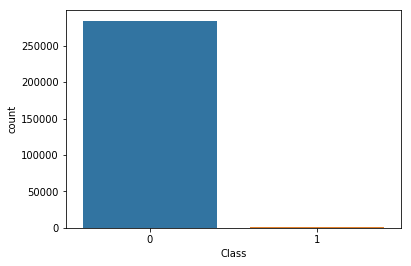

0    284315
1       492
Name: Class, dtype: int64

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()
dt['Class'].value_counts()

Vemos que la cantidad de datos clasificados como fraude (Class = 1) es muy pequeña en comparación con la cantidad total de datos (284807). Es un problema con clases extremadamente desbalanceadas.

## b)
Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [4]:
from sklearn.preprocessing import StandardScaler
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


No necesitamos estandarizar el resto pues provienen del resultado de aplicar PCA a los atributos originales. Estamos confiando en que cuando se hizo, se estandarizaron los datos originales. Los datos de entrada tienen media 0, aunque no necesariamente varianza 1, como vemos a continuación. Los atributos están ordenados por componentes principales. El primero tiene la mayor varianza, y el último la menor.

In [5]:
dt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


## c)
Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta función deberá mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas métricas. Deberá además mostrar una curva ROC junto al valor del área bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qué es una matriz de confusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qué relación tiene con la matriz de confusión?

In [6]:
from sklearn.metrics import roc_curve,auc

def model(model, features_train, features_test, labels_train, labels_test):
    
    # Entrenamiento del modelo
    clf = model
    clf.fit(features_train, labels_train.values.ravel())
    
    # Prediccion de etiquetas y de probabilidades
    pred = clf.predict(features_test)
    prob = clf.predict_proba(features_test)
    
    # Construccion de la matriz de confusion
    cnf_matrix = confusion_matrix(labels_test, pred)
    fpr,tpr,_ = roc_curve(labels_test,prob[:,1],1)
    roc_auc = auc(fpr,tpr)
    return fpr,tpr,roc_auc,cnf_matrix,pred

   
    
    # Construccion de curva ROC
    
    #print prob
    
    
    
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend()
    plt.show()
    
def show_results(fpr,tpr,roc_auc,cnf_matrix,pred,labels_test):
    
    print("The recall for this model is: %f" % (float(cnf_matrix[1, 1]) / (cnf_matrix[1, 1] + cnf_matrix[1, 0])))
    fig = plt.figure(figsize=(6, 3))
    print("TP: %d" % cnf_matrix[1, 1,])
    print("TN: %d" % cnf_matrix[0, 0])
    print("FP: %d" % cnf_matrix[0, 1])
    print("FN: %d" % cnf_matrix[1, 0])
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test, pred))
    
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend()
    plt.show()
    
    

La matriz de confusión muestra el comportamiento del clasificador para cada clase, incluyendo:
- Verdaderos Positivos (TP): Los datos que son de la clase, que fueron clasificados correctamente.
- Verdaderos Negativos (TN): Los datos que no son de la clase, que fueron clasificados correctamente.
- Falsos Positivos (FP): Los datos que no son de la clase, pero que el clasificador indicó que sí lo eran.
- Falsos Negativos (FN): Los datos que son de la clase, pero que el clasificador indicó que no lo eran.

Luego de ser clasificado, cada dato cae en una de estas cuatro categorías de la matriz de confusión. A partir de ella podemos calcular varias métricas, cuya importancia depende del problema en cuestión. Por ejemplo, en este problema, al ser una clase muy poco balanceada, podríamos crear un clasificador que dijera que nunca es de la clase fraude, y tendría un excelente desempeño mirando el total de los datos. Sin embargo, lo que nos interesa es justamente detectar el fraude, aun cuando podamos cometer algunos errores adicionales en la clase que no es fraude. Estas métricas son:
- Precisión: $\frac{\text{TP}}{\text{TP} + \text{FP}}$. La proporción de los datos clasificados en la clase, que fueron correctamente clasificados.
- Recall: $\frac{\text{TP}}{\text{TP} + \text{FN}}$. La proporción de datos que son de la clase, que fueron clasificados en esta clase por el clasificador.
- Accuracy: $\frac{\text{TP} + \text{FN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}$. Medida global de desempeño, que indica la proporción de las clasificaciones (independiente de la clase) fueron correctas.

En este experimento, nos fijaremos especialmente en el Recall y en la Precision, ya que queremos detectar el fraude (recall alto), y ojalá equivocándonos lo menos posible (precision alta). Siempre existe un conflicto entre ambas métricas. Al ir variando parámetros del modelo, generalmente podemos mejorar el recall, disminuyendo la precisión. 

La curva ROC es una medida gráfica de la sensibilidad de un clasificador al threshold de clasificación. En ésta se grafica cómo varía la razón de Verdaderos Positivos (TPR) vs la razón Falsos Positivos (FPR) a medida que el threshold de clasificación aumenta desde 0 a 1 en el caso de que el clasificador decida las clases en base a probabilidades. Con un threshold de 0, el clasificador no clasificará ningún dato como positivo, por lo cual no se obtendrán ni Verdaderos Positivos ni Falsos Positivos, empezando la curva siempre en el (0,0). Si a medida que aumenta el threshold, desde 0 a 0.5 por lo general, aumenta considerablemente la razón de Verdaderos Positivos frente a la de Falsos Positivos, quiere decir que el clasificador está haciendo un buen trabajo en cuanto a las probabilidades que está asociando a los datos de test. Ésto se reflejará en que la curva ROC incremente mucho en la dirección positiva del eje Y sin que aumenta demasiado en la dirección positiva del eje X. Luego de traspasar el threshold de 0.5, por lo general, empezarán a aparecer una mayor cantidad de Falsos Positivos hasta que la curva se desplace a (1,1), es decir, se llega a un threshold en el que todos los datos son clasificados como de la clase positiva y por ende el TPR y el FPR es de 1 y 1 respectivamente. Aquellos clasificadores que produzcan una curva ROC con mayor área se dice que son menos sensibles al threshold y que son mejores clasificadores.  Por otro lado, si un clasificador fuese completamente arbitrario en su decisión, su curva ROC sería una recta que conecta los puntos (0,0) y (1,1), indicando que el proceso de asignación de clases es completamente arbitrario.

La relación entre la curva ROC y la matriz de confusión es que la matriz de confusión equivale a un punto en particular de la curva ROC, aquel punto que emplea el threshold utilizado realmente por el algoritmo.

## d)
Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique que está haciendo la función.

In [7]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features = x.iloc[:, x.columns != "Class"]
    x_labels = x.iloc[:, x.columns == "Class"]
    x_train, x_test, y_train, y_test = train_test_split(x_features, x_labels, test_size=0.3)
    print("Length of training data: %d" % len(x_train))
    print("Length of test data: %d" % len(x_test))
    return (x_train, x_test, y_train, y_test)

Se está separando la data en train y test a partir de un muestreo aleatorio el cual considera el 30% de los datos como test y el 70% como train.

## e)
Defina una función que realice Undersample. ¿Explique en que consiste esta técnica?

In [8]:
def undersample(data,times,verbose=False):
    
    # Obtención de los indices de los datos de cada clase
    fraud_indices = np.array(data[data.Class == 1].index)
    normal_indices = np.array(data[data.Class == 0].index)
    
    # Conteo de datos por cada clase
    Count_Normal_transacation = len(data[data["Class"] == 0])
    Count_Fraud_transacation = len(data[data["Class"] == 1])
    
    # Sub-muestreo de  datos normales en proporcion a cantidad de datos fraudulentos
    # La proporcion del sub-muestreo es de times*datos_fraudulentos
    Normal_indices_undersample = np.array(np.random.choice(normal_indices, times * Count_Fraud_transacation, replace=False))
    undersample_data= np.concatenate([fraud_indices, Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data, :]
    
    # Printeo de proporciones
    normal = (float(len(undersample_data[undersample_data.Class == 0])) / len(undersample_data["Class"]))
    if verbose == True:
        print("The normal transacation proportion is : %f" % normal) 
    fraud = (float(len(undersample_data[undersample_data.Class == 1])) / len(undersample_data["Class"]))
    
    if verbose == True:
        print("The fraud transaction proportion is : %f" % fraud)
    
    # Separación en input output
    u_X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    u_y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    return u_X,u_y

Undersample es una técnica que altera la distribución de los datos de la clase mayoritaria con el fin de generar una distribución más balanceada entre las clases a través de la eliminación de datos de la clase mayoritaria. Existen diversas formas de realizar ésto, siendo la técnica implementada en esta tarea la de simplemente elegir cuál se quiere sea la proporción entre ambas clases y seleccionar aleatoriamente datos de la clase mayoritaria para cumplir esta distribución.  El problema de esta técnica es que se está eliminando información acerca de la clase mayoritaria, y si se hace sin alguna técnica apropiada; como es el caso en esta implementación, se pueden terminar eliminando ejemplos que aporten mucha información al problema y por ende la construcción de las fronteras de decisión no generalicen tan bien.

## f)
Genere un modelo de Logistic Regression y otro a su elección utilizando UnderSample. Concluya a partir de los resultados.

Para poder evaluar con mayor robustez, debido a que Undersample es una técnica que utiliza selección aleatoria de datos, se utilizará la técnica 21 veces sobre el mismo conjunto de train y test, con tal de buscar aproximar de mejor manera la "esperanza" del error de generalización de la técnica. EL conjunto de train y test se repiten en cada experimento ya nos parece que la cantidad de datos de éstos hacen que sean lo suficientemente representativos de la distribución subyacente. Para confirmar ésto sería necesario poseer herramientas estadísticas con las cuales no contamos, por lo cual nos conformamos con notar que si bien la aproximación del error de generalización que estamos realizando puede no ser una aproximación robusta, es una aproximación al fin y al cabo. 

Como resultados, se muestran las curvas ROC, matriz de confusión y false/true positive rates de la mediana de los 21 experimentos para cada configuración de parámetros.

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.500000
The fraud transaction proportion is : 0.500000
--------------------------Resultados Mediana Logistic Regression-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.905109
TP: 124
TN: 82017
FP: 3289
FN: 13


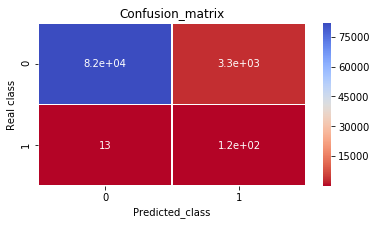


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85306
          1       0.04      0.91      0.07       137

avg / total       1.00      0.96      0.98     85443



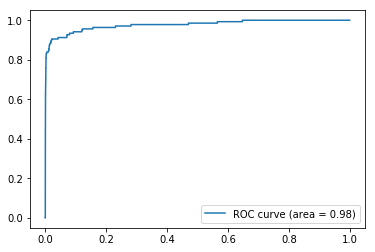

The undersample data for 2 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.666667
The fraud transaction proportion is : 0.333333
--------------------------Resultados Mediana Logistic Regression-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.890511
TP: 122
TN: 84295
FP: 1011
FN: 15


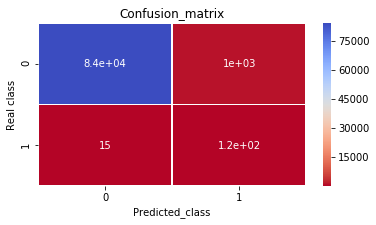


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85306
          1       0.11      0.89      0.19       137

avg / total       1.00      0.99      0.99     85443



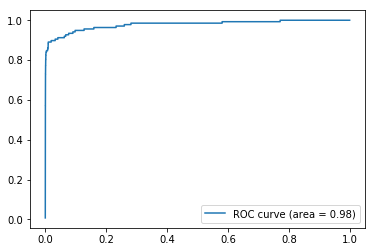

The undersample data for 3 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.750000
The fraud transaction proportion is : 0.250000
--------------------------Resultados Mediana Logistic Regression-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.854015
TP: 117
TN: 84766
FP: 540
FN: 20


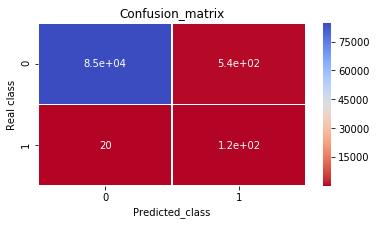


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85306
          1       0.18      0.85      0.29       137

avg / total       1.00      0.99      1.00     85443



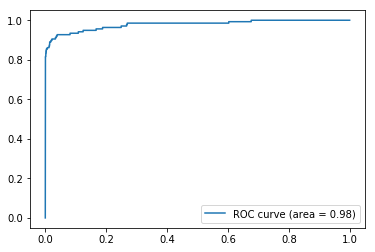

The undersample data for 1 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.500000
The fraud transaction proportion is : 0.500000
--------------------------Resultados Mediana LDA-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.824818
TP: 113
TN: 83899
FP: 1407
FN: 24


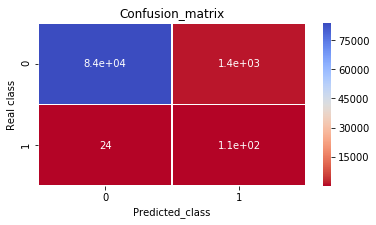


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85306
          1       0.07      0.82      0.14       137

avg / total       1.00      0.98      0.99     85443



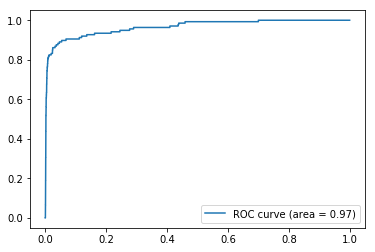

The undersample data for 2 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.666667
The fraud transaction proportion is : 0.333333
--------------------------Resultados Mediana LDA-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.802920
TP: 110
TN: 84826
FP: 480
FN: 27


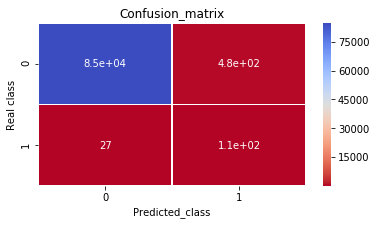


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85306
          1       0.19      0.80      0.30       137

avg / total       1.00      0.99      1.00     85443



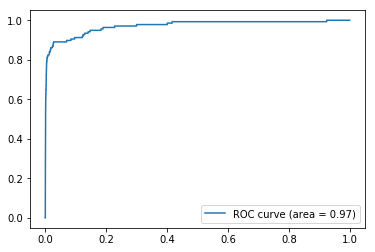

The undersample data for 3 proportion

--------------------------Validation Set---------------------------
The normal transacation proportion is : 0.750000
The fraud transaction proportion is : 0.250000
--------------------------Resultados Mediana LDA-------------
--------------------------Test Set---------------------------
The recall for this model is: 0.788321
TP: 108
TN: 84983
FP: 323
FN: 29


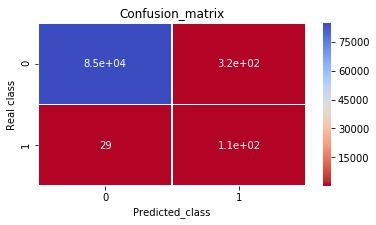


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85306
          1       0.25      0.79      0.38       137

avg / total       1.00      1.00      1.00     85443



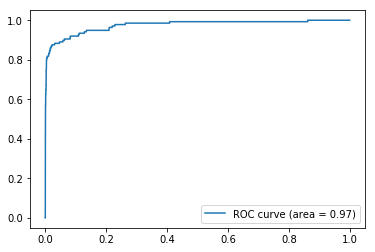

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, recall_score, precision_recall_curve, auc,roc_curve, roc_auc_score, classification_report
x_tr, x_ts, y_tr, y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

funcs = [LogisticRegression, LinearDiscriminantAnalysis]
names = ['Logistic Regression', 'LDA']
for k in range(2):
    
    for i in range(1, 4):

        aoc_sets = []
        tp_rates = []
        fp_rates = []
        cnf_matrixes = []
        preds = []

        print("The undersample data for " + str(i) + " proportion\n")
        
        #u_x,u_y = undersample(x_tr, i,verbose=False)
        #Undersample_data = pd.DataFrame(np.concatenate([u_x,u_y],axis=1), columns=x_tr.columns)
        #u_x, u_xt, u_yx, u_yxt = data_prepration(Undersample_data)
        #clf = funcs[k]()
        print("--------------------------Validation Set---------------------------")
        #model2(clf, u_x, u_xt, u_yx, u_yxt)
              
        for j in range(21):
            
            verbose = False
            
            if j==0:
                verbose = True
        
            under_x,under_y = undersample(x_tr, i,verbose=verbose)
            #print("\n----------------------Validation Set------------------------")
            #print("\nThe model classification for " + str(i) + " proportion\n")
            #under_x, under_xt, under_yx, under_yxt = data_prepration(Undersample_data)

            #clf = LogisticRegression()
            clf = funcs[k]()

            #clf2 = LinearDiscriminantAnalysis

            #model(clf, under_x, under_xt, under_yx, under_yxt)


            #print("--------------------------Testing Set---------------------------")
            fpr,tpr,roc_auc,cnf_matrix,pred = model(clf, under_x, x_ts, under_y, y_ts)
            aoc_sets.append(roc_auc)
            tp_rates.append(tpr)
            fp_rates.append(fpr)
            cnf_matrixes.append(cnf_matrix)
            preds.append(pred)

        # Resultados de la mediana 

        print("--------------------------Resultados Mediana "+names[k]+"-------------")
        print("--------------------------Test Set---------------------------")

        index = np.argsort(aoc_sets)[10]
        show_results(fp_rates[index],tp_rates[index],aoc_sets[index],cnf_matrixes[index],preds[index],y_ts)


A partir de los reportes de clasificación, notamos como a medida que aumentamos la proporción de datos de la clase mayoritaria utilizando undersampling con respecto a la minoritaria, el recall disminuye y la precisión aumenta ligeramente. Este fenómeno ocurre tanto para Logistic Regression como para LDA. Logistic Regression en general obtiene un mejor recall que LDA pero éste a su vez obtiene una mejor precisión que Logistic Regression. Sin embargo, observamos que LDA obtiene un mejor f1-score que Logistic Regression para todas las proporciones, debido a que LDA es menos sensible al desbalanceo de clases. Esto se debe a que LDA determina la frontera de decisión entre las clases teniendo en cuenta sólo la media de cada clase y la varianza de todos los datos. Por su parte, Logistic Regression sí es sensible a las clases desbalanceadas debido a que calcula la frontera de decisión en base a los errores de clasificación.

El obtener una precisión muy baja quiere decir que se están clasificando muchas transacciones como fraudulentas cuando en realidad no lo son. Es lógico que ésto suceda si disminuimos la cantidad de datos de transacciones no fraudulentas, ya que probablemente una gran cantidad de datos que se encuentran en la frontera de decisión entre ambas clases se están perdiendo, ocasionando que el algoritmo tenga un fuerte cesgo a la hora de elegir esta frontera. Por la misma razón el recall disminuye a medida que aumentan los datos de la clase de transacciones no fraudulentas, ya que si, por ejemplo, la frontera de decisión es original de los datos es no lineal, el clasificador debe elegir a qué clase privilegiar con tal de disminuir el error total del modelo. Entonces, se privilegia claramente a la clase mayoritaria , disminuyendo en consecuencia la cantidad de datos clasificados como fraudulentos en consecuencia.

Respecto a los datos de validación, podemos concluir que no son en absoluto representativos de la muestra real, y que por ende no deben ser utilizados para estimar parámetros ya que no se condicen con la capacidad de generalización inferida a través del test set.

Respecto a la Curva ROC, notamos que ésta apenas sí varía y que en este caso no es un indicador confiable del desempeño del algoritmo. Se debe estudiar más a fondo la razón  de por qué ésto sucede y como puede ser corregido.

## g)
Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling y SMOTE (Hint: Para SMOTE usted puede apoyarse de la libreria imblearn)

## Oversample

Esta técnica consiste en, realizar el procedimiento opuesto a Undersample: se sobremuestrea a partir de la clase minoritaria tantos ejemplos como se requiera para que la distribución de las clases esté más balanceada. El dataset generado entonces contiene una gran cantidad de copias de los datos de la clase minoritaria, con la esperanza de que al realizar ésto no se favorezca a la clase mayoritaria pero a su vez no se pierda información de ésta como en Undersampling. El problema es, claramente, que esta técnica puede producir Overfitting, ya que las fronteras de decisión generadas serán muy sensibles a los datos repetidos: si bien antes mal clasificador un dato de la clase minoritaria no suponía un gran costo en la función de pérdida, ahora mal clasificador un dato equivale a mal clasificar una gran proporción de éstos (debido a la repetición), con lo que se incurre en una mayor pérdida .


In [10]:
def oversample(data,times,verbose=False):
    
    # Obtención de los indices de los datos de cada clase
    fraud_indices = np.array(data[data.Class == 1].index)
    normal_indices = np.array(data[data.Class == 0].index)
    
    # Conteo de datos por cada clase
    Count_Normal_transacation = len(data[data["Class"] == 0])
    Count_Fraud_transacation = len(data[data["Class"] == 1])
    
    # Sub-muestreo de  datos normales en proporcion a cantidad de datos fraudulentos
    # La proporcion del sub-muestreo es de times*datos_fraudulentos
    Fraud_indices_undersample = np.array(np.random.choice(fraud_indices, Count_Normal_transacation/times, replace=True))
    oversample_data= np.concatenate([normal_indices, Fraud_indices_undersample])
    oversample_data = data.iloc[oversample_data, :]
    
    # Printeo de proporciones
    normal = (float(len(oversample_data[oversample_data.Class == 0])) / len(oversample_data["Class"]))
    if verbose == True:
        print("The normal transacation proportion is : %f" % normal)
    fraud = (float(len(oversample_data[oversample_data.Class == 1])) / len(oversample_data["Class"]))
    if verbose == True:
        print("The fraud transacation proportion is : %f" % fraud)
    # Separación en input output
    o_X = oversample_data.iloc[:, oversample_data.columns != "Class"]
    o_y = oversample_data.iloc[:, oversample_data.columns == "Class"]
    return o_X,o_y

En este caso, debido a que si bien oversample se ha implementado como una técnica aleatoria, la distribución subyacente a los datos dificilmente cambiará al hacer un sobre muestreo de éstos datos a partir de una distribución uniforme. Ésto se debe a que la cantidad de datos de la clase mayoritaria es tal, que se espera que si sobre muestreamos la clase minoritaria para llevar ambas clases a una distribución similar, la proporción de veces que aparece cada dato sobremuestreado sea aproximadamente la misma. Por ende, no vale la pena repetir el experimento una gran cantidad de veces para aumentar la robustez de la aproximación del error de generalización del método calculado sobre el test set, ya que con gran probabilidad el experimento generará conjuntos de datos con diferencias mínimas.

Length of training data: 199364
Length of test data: 85443
The oversample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
--------------------------ResultadosLogistic Regression-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.930556
TP: 134
TN: 83097
FP: 2202
FN: 10


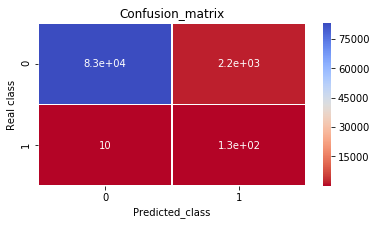


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85299
          1       0.06      0.93      0.11       144

avg / total       1.00      0.97      0.99     85443



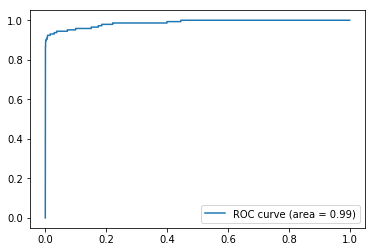

The oversample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
--------------------------ResultadosLogistic Regression-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.923611
TP: 133
TN: 84133
FP: 1166
FN: 11


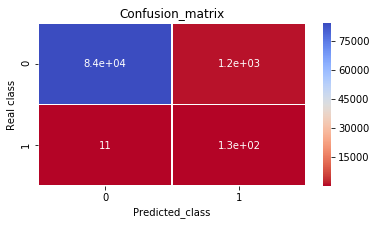


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85299
          1       0.10      0.92      0.18       144

avg / total       1.00      0.99      0.99     85443



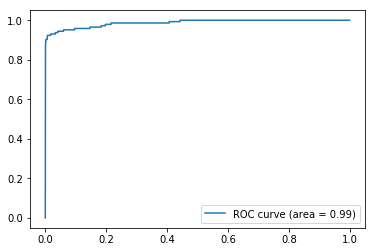

The oversample data for 3 proportion

The normal transacation proportion is : 0.750002
The fraud transacation proportion is : 0.249998
--------------------------ResultadosLogistic Regression-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.923611
TP: 133
TN: 84511
FP: 788
FN: 11


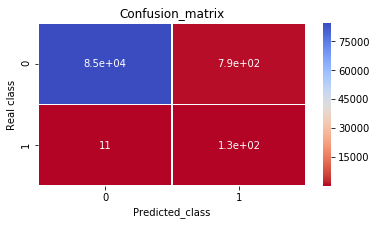


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85299
          1       0.14      0.92      0.25       144

avg / total       1.00      0.99      0.99     85443



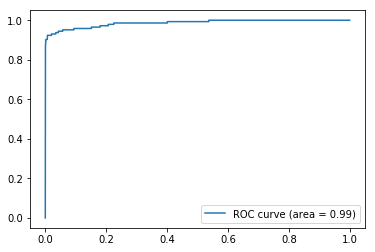

The oversample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
--------------------------ResultadosLDA-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.875000
TP: 126
TN: 84133
FP: 1166
FN: 18


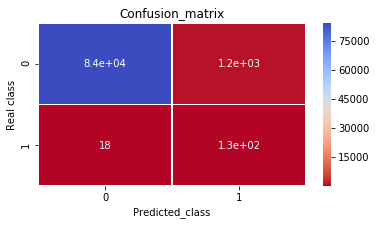


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85299
          1       0.10      0.88      0.18       144

avg / total       1.00      0.99      0.99     85443



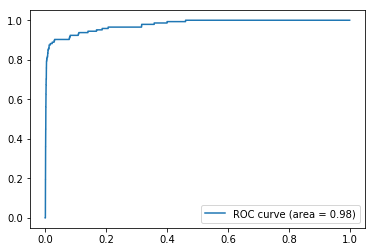

The oversample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
--------------------------ResultadosLDA-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.819444
TP: 118
TN: 84939
FP: 360
FN: 26


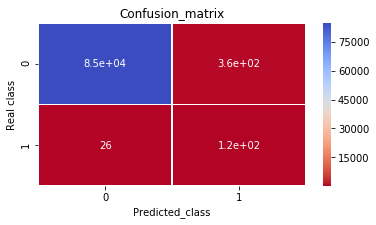


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.25      0.82      0.38       144

avg / total       1.00      1.00      1.00     85443



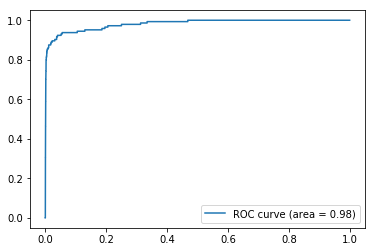

The oversample data for 3 proportion

The normal transacation proportion is : 0.750002
The fraud transacation proportion is : 0.249998
--------------------------ResultadosLDA-----------------
--------------------------Test Set---------------------------
The recall for this model is: 0.812500
TP: 117
TN: 85105
FP: 194
FN: 27


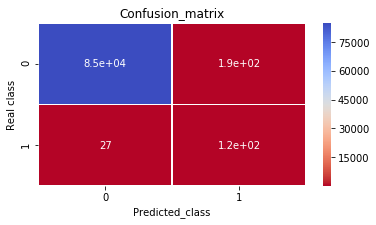


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.38      0.81      0.51       144

avg / total       1.00      1.00      1.00     85443



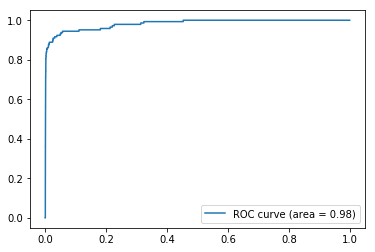

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_recall_curve, auc,roc_curve, roc_auc_score, classification_report
x_tr, x_ts, y_tr, y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

funcs = [LogisticRegression, LinearDiscriminantAnalysis]
names = ['Logistic Regression', 'LDA']
for k in range(2):
    for i in range(1, 4):

        aoc_sets = []
        tp_rates = []
        fp_rates = []
        cnf_matrixes = []
        preds = []

        print("The oversample data for " + str(i) + " proportion\n")

        for j in range(1):


            over_x,over_y = oversample(x_tr, i,verbose=True)
            #print("\n----------------------Validation Set------------------------")
            #print("\nThe model classification for " + str(i) + " proportion\n")
            #under_x, under_xt, under_yx, under_yxt = data_prepration(Undersample_data)
        
            clf = funcs[k]()
            #clf = LogisticRegression()

            #model(clf, under_x, under_xt, under_yx, under_yxt)


            #print("--------------------------Testing Set---------------------------")
            fpr,tpr,roc_auc,cnf_matrix,pred = model(clf, over_x, x_ts, over_y, y_ts)
            aoc_sets.append(roc_auc)
            tp_rates.append(tpr)
            fp_rates.append(fpr)
            cnf_matrixes.append(cnf_matrix)
            preds.append(pred)

        # Resultados de la mediana 

        print("--------------------------Resultados"+names[k]+"-----------------")
        print("--------------------------Test Set---------------------------")

        index = np.argsort(aoc_sets)[0]
        show_results(fp_rates[index],tp_rates[index],aoc_sets[index],cnf_matrixes[index],preds[index],y_ts)
        

Nuevamente observamos que al incrementar la proporción de datos de la clase mayoritaria por sobre la minoritaria, se está aumentando la precisión del algoritmo pero se disminuye el recall. En este caso sí podemos afirmar que el problema consiste en que la frontera de decisión entre los datos de ambas clases es difusa, ya que los separadores lineales no están siendo capaces de establecer una frontera que corresponde a la real separación de las clases, si no que simplemente están maximizando la función de pérdida en relación a la cantidad de datos que hayan de cada clase. Con esto podemos argumentar que, debido a que los resultados con Oversampling y Undersampling son extremadamente similares, y éste último fue un experimento repetido varias veces la distribución subyacente a las clases es no-linealmente separable y, aparte de técnicas para trabajar con desbalancea de clases, se necesitan clasificadores más aptos para poder lidiar con este tipo de fronteras. La curva ROC nuevamente se comporta muy similar para todos los casos, con lo cual confirmamos que o ésta no nos sirve para esta clase de problemas o que existe un problema con la implementación que debiese ser solucionado. Las mismas conclusiones acerca del set de validación del ejercicio anterior son válidas para oversampling.

## SMOTE

SMOTE es una técnica para trabajar con clases desbalanceadas que genera datos sintéticos a partir a partir de los datos de clase minoritaria con tal de generar un Sobremuestro de la clase minoritaria. La creación de los datos sintéticos se realiza a partir de determinar los k vecinos más cercanos de los datos, trazar rectas entre los datos y sus vecinos y aleatoriamente seleccionar puntos entre los datos y sus vecinos con tal de generar muestras que rellenen el espacio de características en el que se encuentra la clase minoritaria. Con esto se busca que se obtenga una represetanción más densa del manifold en el que vive la clase minoritaria y, a diferencia de Oversampling corriente, no se produzca overfitting al simplemente repetir los datos de la clase sin tratar de aprender la estructura subyacente.

In [14]:
def model2(model, features_train, features_test, labels_train, labels_test):
    clf = model
    clf.fit(features_train, labels_train.values.ravel())
    pred = clf.predict(features_test)
    prob = clf.predict_proba(features_test)
    cnf_matrix = confusion_matrix(labels_test, pred)
    print("The recall for this model is: %f" % (float(cnf_matrix[1, 1]) / (cnf_matrix[1, 1] + cnf_matrix[1, 0])))
    fig = plt.figure(figsize=(6, 3))
    print("TP: %d" % cnf_matrix[1, 1,])
    print("TN: %d" % cnf_matrix[0, 0])
    print("FP: %d" % cnf_matrix[0, 1])
    print("FN: %d" % cnf_matrix[1, 0])
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test, pred))
    
    fpr,tpr,_ = roc_curve(labels_test,prob[:,1],1)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend()
    plt.show()

Length of training data: 199364
Length of test data: 85443

The model classification for 1 proportion

The smote data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
--------------------------Resultados Logistic Regression-----------------

----------------------Validation Set------------------------
Length of training data: 278642
Length of test data: 119418
The recall for this model is: 0.919294
TP: 54926
TN: 58018
FP: 1652
FN: 4822


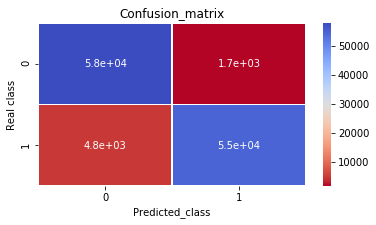


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95     59670
        1.0       0.97      0.92      0.94     59748

avg / total       0.95      0.95      0.95    119418



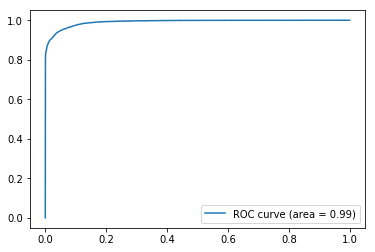

--------------------------Testing Set---------------------------
The recall for this model is: 0.905063
TP: 143
TN: 82900
FP: 2385
FN: 15


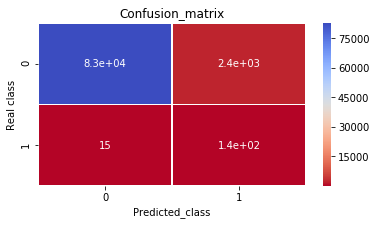


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85285
          1       0.06      0.91      0.11       158

avg / total       1.00      0.97      0.98     85443



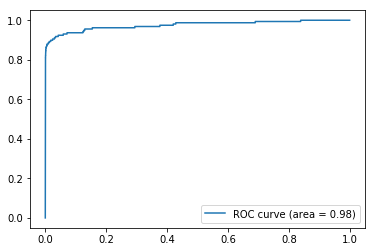

---------------------------------------------------------------

The model classification for 2 proportion

The smote data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
--------------------------Resultados Logistic Regression-----------------

----------------------Validation Set------------------------
Length of training data: 208981
Length of test data: 89564
The recall for this model is: 0.897730
TP: 26729
TN: 58914
FP: 876
FN: 3045


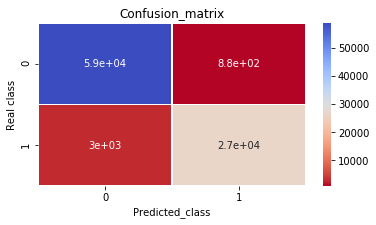


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97     59790
        1.0       0.97      0.90      0.93     29774

avg / total       0.96      0.96      0.96     89564



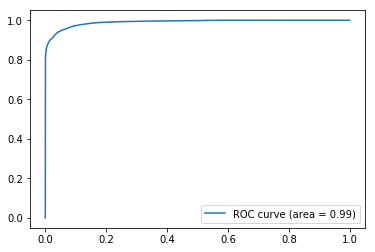

--------------------------Testing Set---------------------------
The recall for this model is: 0.898734
TP: 142
TN: 84083
FP: 1202
FN: 16


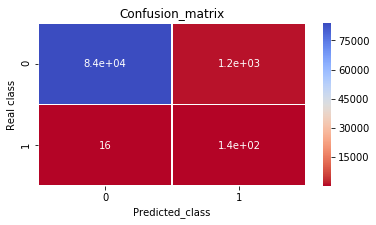


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85285
          1       0.11      0.90      0.19       158

avg / total       1.00      0.99      0.99     85443



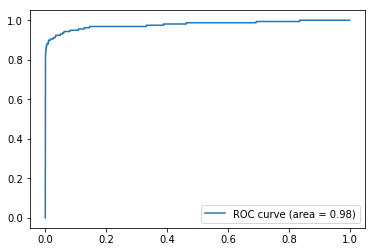

---------------------------------------------------------------

The model classification for 3 proportion

The smote data for 3 proportion

The normal transacation proportion is : 0.750001
The fraud transacation proportion is : 0.249999
--------------------------Resultados Logistic Regression-----------------

----------------------Validation Set------------------------
Length of training data: 185761
Length of test data: 79612
The recall for this model is: 0.884113
TP: 17814
TN: 58918
FP: 545
FN: 2335


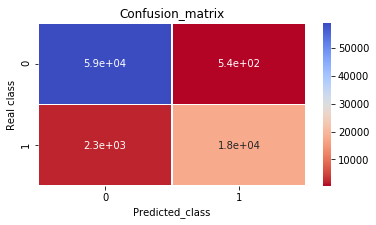


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98     59463
        1.0       0.97      0.88      0.93     20149

avg / total       0.96      0.96      0.96     79612



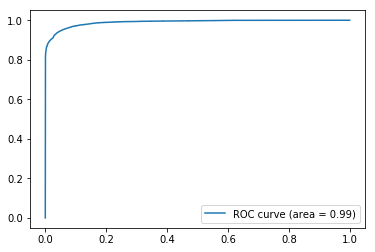

--------------------------Testing Set---------------------------
The recall for this model is: 0.886076
TP: 140
TN: 84546
FP: 739
FN: 18


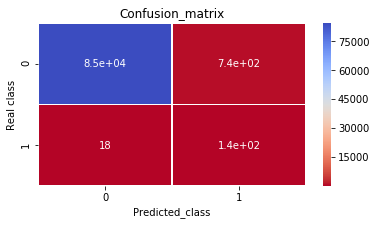


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85285
          1       0.16      0.89      0.27       158

avg / total       1.00      0.99      0.99     85443



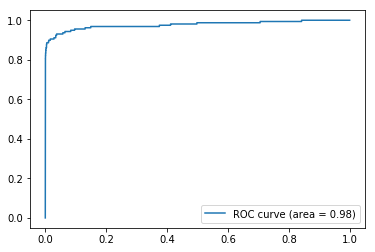

---------------------------------------------------------------

The model classification for 1 proportion

The smote data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000
--------------------------Resultados LDA-----------------

----------------------Validation Set------------------------
Length of training data: 278642
Length of test data: 119418
The recall for this model is: 0.848088
TP: 50658
TN: 58796
FP: 890
FN: 9074


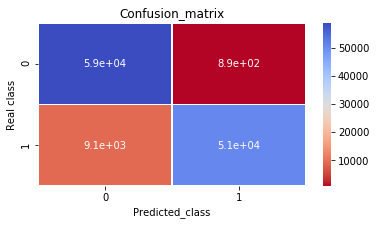


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.87      0.99      0.92     59686
        1.0       0.98      0.85      0.91     59732

avg / total       0.92      0.92      0.92    119418



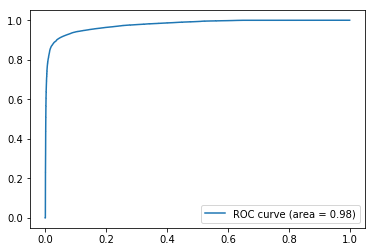

--------------------------Testing Set---------------------------
The recall for this model is: 0.860759
TP: 136
TN: 84027
FP: 1258
FN: 22


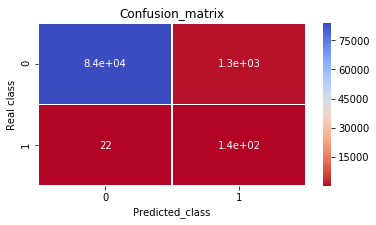


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85285
          1       0.10      0.86      0.18       158

avg / total       1.00      0.99      0.99     85443



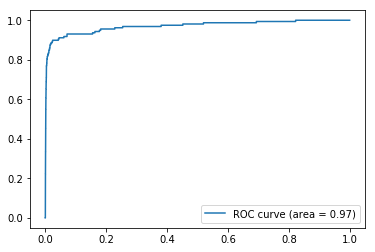

---------------------------------------------------------------

The model classification for 2 proportion

The smote data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333
--------------------------Resultados LDA-----------------

----------------------Validation Set------------------------
Length of training data: 208981
Length of test data: 89564
The recall for this model is: 0.786449
TP: 23411
TN: 59538
FP: 258
FN: 6357


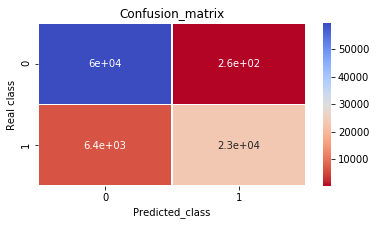


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95     59796
        1.0       0.99      0.79      0.88     29768

avg / total       0.93      0.93      0.92     89564



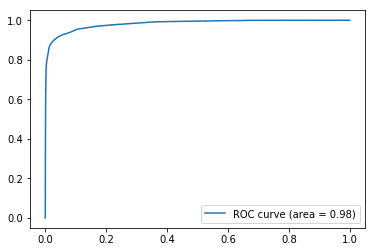

--------------------------Testing Set---------------------------
The recall for this model is: 0.829114
TP: 131
TN: 84900
FP: 385
FN: 27


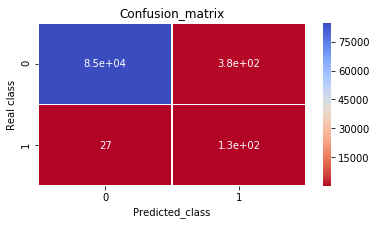


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.25      0.83      0.39       158

avg / total       1.00      1.00      1.00     85443



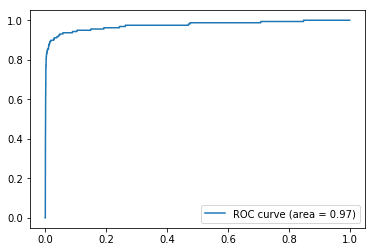

---------------------------------------------------------------

The model classification for 3 proportion

The smote data for 3 proportion

The normal transacation proportion is : 0.750001
The fraud transacation proportion is : 0.249999
--------------------------Resultados LDA-----------------

----------------------Validation Set------------------------
Length of training data: 185761
Length of test data: 79612
The recall for this model is: 0.768552
TP: 15318
TN: 59547
FP: 134
FN: 4613


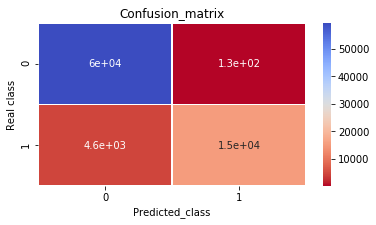


----------Classification Report------------------------------------
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96     59681
        1.0       0.99      0.77      0.87     19931

avg / total       0.94      0.94      0.94     79612



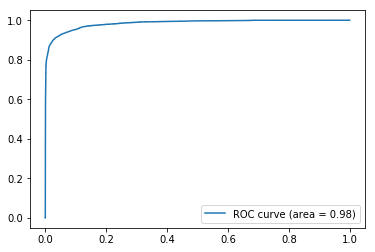

--------------------------Testing Set---------------------------
The recall for this model is: 0.816456
TP: 129
TN: 85100
FP: 185
FN: 29


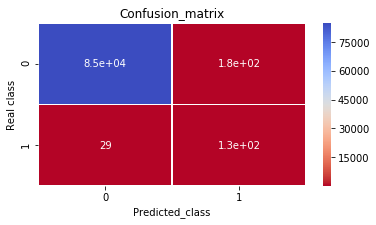


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.41      0.82      0.55       158

avg / total       1.00      1.00      1.00     85443



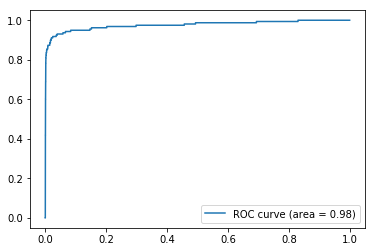

---------------------------------------------------------------


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve, roc_auc_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from imblearn.over_sampling import SMOTE


x_tr, x_ts, y_tr, y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
funcs = [LogisticRegression, LinearDiscriminantAnalysis]
names = ['Logistic Regression', 'LDA']

for k in range(2):
    for i in range(1,4):
        
        print "\nThe model classification for " + str(i) + " proportion\n"
        x_tr_smote = x_tr
        
        os = SMOTE(random_state=0, ratio=dict([(1, len(x_tr[x_tr["Class"]==0])/i)]))

        x_tr_smote = x_tr_smote.drop(["Class"], axis=1)

        os_data_X,os_data_y = os.fit_sample(x_tr_smote, y_tr)
        
        os_dt = pd.DataFrame(np.concatenate([os_data_X,os_data_y.reshape(-1,1)],axis=1), columns=x_tr.columns)
        
        print "The smote data for " + str(i) + " proportion\n"
        
        normal = (float(len(os_dt[os_dt.Class == 0])) / len(os_dt["Class"]))
        print("The normal transacation proportion is : %f" % normal)
        fraud = (float(len(os_dt[os_dt.Class == 1])) / len(os_dt["Class"]))
        print("The fraud transacation proportion is : %f" % fraud)
        
        print("--------------------------Resultados "+names[k]+"-----------------")
        print "\n----------------------Validation Set------------------------"
        
        s_x,s_xt,s_yx,s_yxt=data_prepration(os_dt)
        clf = funcs[k]()
        model2(clf,s_x,s_xt,s_yx,s_yxt)
       
        print "--------------------------Testing Set---------------------------"
        model2(clf,s_x,x_ts,s_yx,y_ts)
        print "---------------------------------------------------------------"


Observamos como se repite el fenómeno que hemos visto en los casos anteriores: el recall de los modelos es alto mientras que la precisión es baja. A medida que se aumenta la proporción de datos con la clase mayoritaria, la precisión aumenta y el recall baja. Lo único diferente que podemos observar con respecto a los casos anteriores, esque LDA llega a una precisión de aproximadamente un 50%  con una proporción de 75% en la clase normal y 25% en la clase minoritaria.  Ésto aún es insatisfactorio para efectos prácticos, pero es quizás a lo mejor que se puede llegar utilizando una frontera de decisión lineal. Los resultados entonces están volviendo a confirmar que el problema raíz no es el desbalanceo de clases, si no que la frontera de decisión es no lineal y por ende se necesitan métodos más poderosos para clasificar correctamente los datos. Si utilizaramos clasificadores no lineales, lo ideal sería utilizar SMOTE para evitar que las fronteras generadas hagan overfitting como sucedería con Oversample y Underfitting como podría suceder con Undersample. Una vez más los conjuntos de validación generados nos muestran que no sería óptimo el realizar elección de parámetros en éstos, ya que el error de generalización sobre éstos no se condice en absoluto con el error de generalización sobre el test set real.